In [2]:
! wget -O ../data/car-price.csv https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-09-28 20:39:31--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘../data/car-price.csv’

../data/car-price.c 100%[===================>]   1.41M  --.-KB/s    in 0.09s   

2023-09-28 20:39:32 (16.0 MB/s) - ‘../data/car-price.csv’ saved [1475504/1475504]



In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/car-price.csv")

In [5]:
price = df['MSRP']

In [6]:
columns = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg"]

In [7]:
df = df[columns]

In [8]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18


In [9]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [10]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16


In [11]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
dtype: int64

In [12]:
df = df.fillna(0)

In [13]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [14]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [15]:
df.select_dtypes(include='number').corr().style.background_gradient(cmap='coolwarm')

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


In [16]:
above_average = (price > price.mean()).astype(int)

In [17]:
above_average

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: MSRP, Length: 11914, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [29]:
X_train_total, X_test, y_train_total, y_test = train_test_split(df, above_average, train_size=0.8, random_state=42)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_total, y_train_total, train_size=0.75, random_state=42)


In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
categorical_cols = df.select_dtypes(include=object).columns

for col in categorical_cols:
    mis = mutual_info_score(X_train[col], y_train)
    print(col, mis)

make 0.23976875439118348
model 0.46234389209653004
transmission_type 0.02095754189630187
vehicle_style 0.08414301956779438


In [23]:
from sklearn.linear_model import LogisticRegression

In [31]:
# one-hot encoding of categorical variables...
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

one_hot_encoder = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     categorical_cols),
     remainder='passthrough')

encoded_X_train = one_hot_encoder.fit_transform(X_train)
encoded_X_valid = one_hot_encoder.transform(X_valid)
encoded_X_test = one_hot_encoder.transform(X_test)


In [32]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(encoded_X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [34]:
preds = model.predict(encoded_X_valid)

In [37]:
acc = (preds == y_valid).mean()

In [38]:
acc

0.9471254720939991

In [39]:
round(acc, 2)

0.95

In [41]:
columns = df.columns

In [42]:
columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [51]:
import numpy as np

In [74]:
for i, col in enumerate([ "year", "engine_hp", "transmission_type", "city_mpg" ]):
   model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
   col_idx = [j for j in range(len(columns)) if j != i]
   model.fit(encoded_X_train[:, col_idx], y_train)
   preds = model.predict_proba(encoded_X_valid[:, col_idx])[:, 1]
   preds = preds > 0.5
   acc_new = (preds == y_valid).mean()
   print(f"{col}: {round(acc - acc_new, 4)}")

year: 0.1565
engine_hp: 0.1565
transmission_type: 0.1628
city_mpg: 0.1658


In [64]:
from sklearn.linear_model import Ridge

In [65]:
price = np.log1p(price)

In [66]:
price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: MSRP, Length: 11914, dtype: float64

<Axes: >

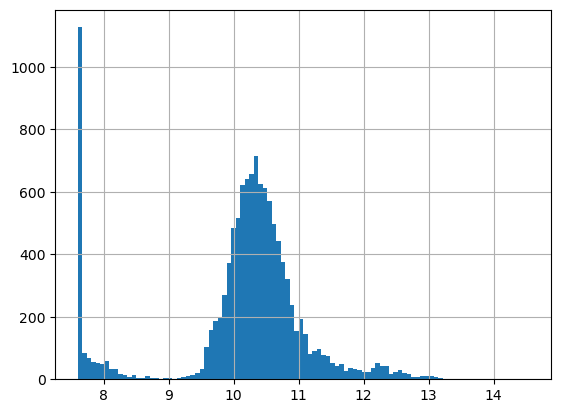

In [67]:
price.hist(bins=100)

In [69]:
from sklearn.metrics import mean_squared_error

In [76]:
price_full_train, price_test = train_test_split(price, train_size=0.8, random_state=42)
price_train, price_valid = train_test_split(price_full_train, train_size=0.75, random_state=42)

In [84]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver='sag', random_state=42)
    model.fit(encoded_X_train, price_train)
    preds = model.predict(encoded_X_valid)
    mse = mean_squared_error(preds, price_valid)
    print(f"{a}: {round(np.sqrt(mse), 3)}")

0: 0.251
0.01: 0.251
0.1: 0.255
1: 0.258
10: 0.331


1918     10.263816
9951     11.005444
5486      9.908027
292      10.576968
3644      7.601402
           ...    
4385     10.023313
7339     10.331888
9806      9.997479
11162    11.725582
3256     10.877500
Name: MSRP, Length: 2383, dtype: float64

In [80]:
encoded_X_valid

<2383x943 sparse matrix of type '<class 'numpy.float64'>'
	with 21373 stored elements in Compressed Sparse Row format>